### Charting with `mplfinance`

One common chart in finance is an OHLC chart, or candlestick charts.

This type of chart is not available in Matplotlib, but the `mplfinance` add-on provides that type of chart.

https://github.com/matplotlib/mplfinance

If you do not have that package already installed in your virtual environment, you can install it using:

```
pip install mplfinance
```

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mplfinance as mpf

In [2]:
mpl.style.use('seaborn-v0_8-darkgrid')

Let's read in some data:

In [3]:
df = pd.read_csv('AAPL_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


Since all this data is for `AAPL`, we don't actually need that `Name` column.

In addition, I want to make the dates the index for the rows - I could load the data first, then convert to datetime and then set the index, but we can actually do this as we load the data from csv.

Lastly, we need the columns to be in the order Open/High/Low/Close/Volume - makes it easier to work with `mpf`. Fortunately that's the case in our csv file (otherwise we could just use fancy indexing to pick the columns in the required order).

In [58]:
data = pd.read_csv(
    'AAPL_data.csv', 
    usecols=['date', 'open', 'high', 'low', 'close', 'volume'],
    index_col=0,
    parse_dates=[0],  # instructs Pandas to parse column 0 as dates
    skipinitialspace=True
)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1259 non-null   float64
 1   high    1259 non-null   float64
 2   low     1259 non-null   float64
 3   close   1259 non-null   float64
 4   volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [59]:
data

,open,high,low,close,volume
date,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154
...,...,...,...,...,...
2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787
2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825
2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522


Given that our index is a DateTime index, and our columns are in the correct order Open/High/Low/Close/Volume, using `mpf` to plot OHLC charts is quite easy.

/home/allwell/code/py/python101/venv/py39/lib/python3.9/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


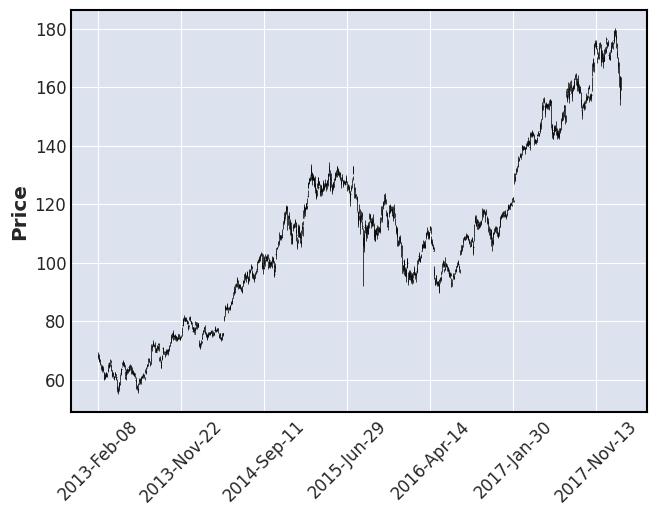

In [60]:
mpf.plot(data)

There's quite a bit of data to chart, and it is too compressed, so I'll plot only a subset of the data, and make the chart a bit larger:

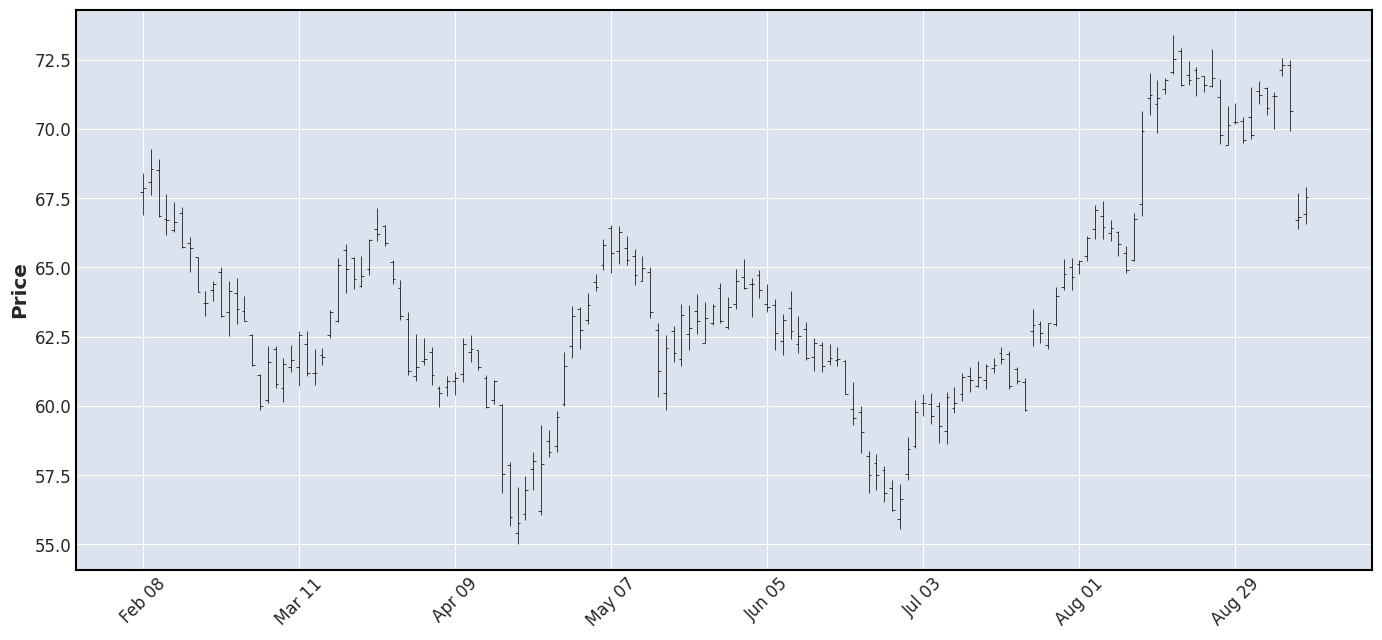

In [61]:
mpf.plot(data.iloc[:150], figsize=(18, 8))

We can change the style of the chart:

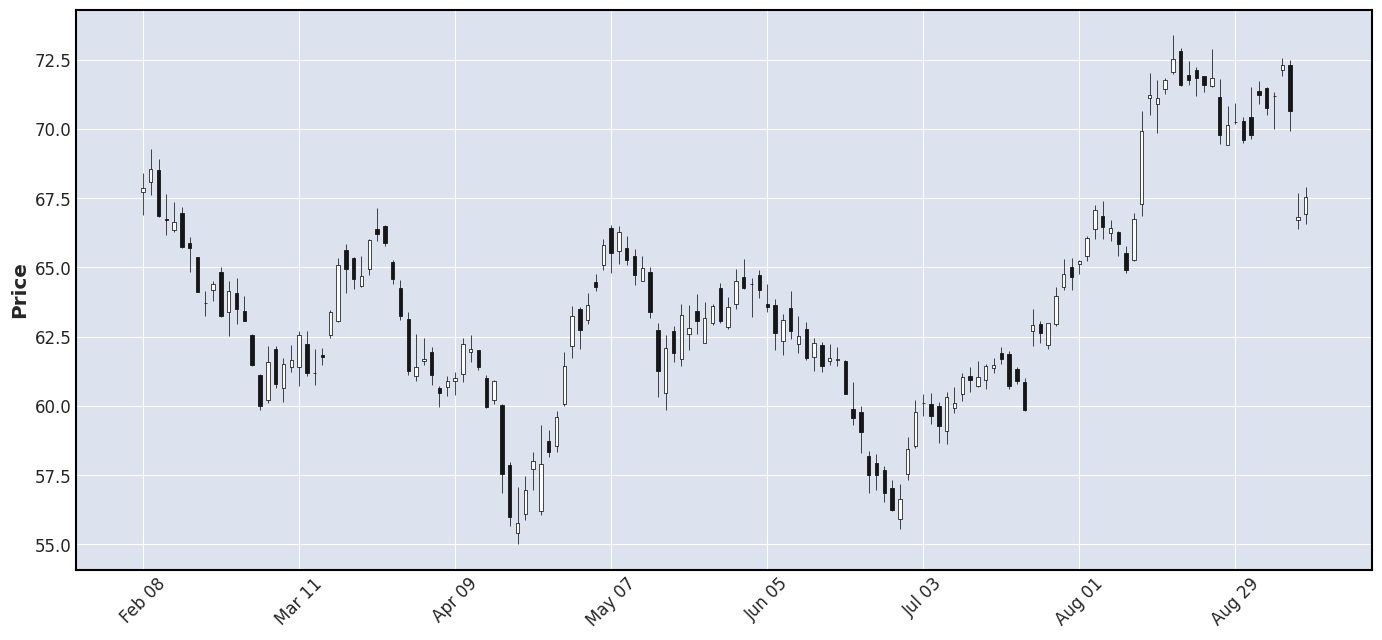

In [22]:
mpf.plot(data.iloc[:150], type='candle', figsize=(18, 8))

We can even add moving average lines very easily:

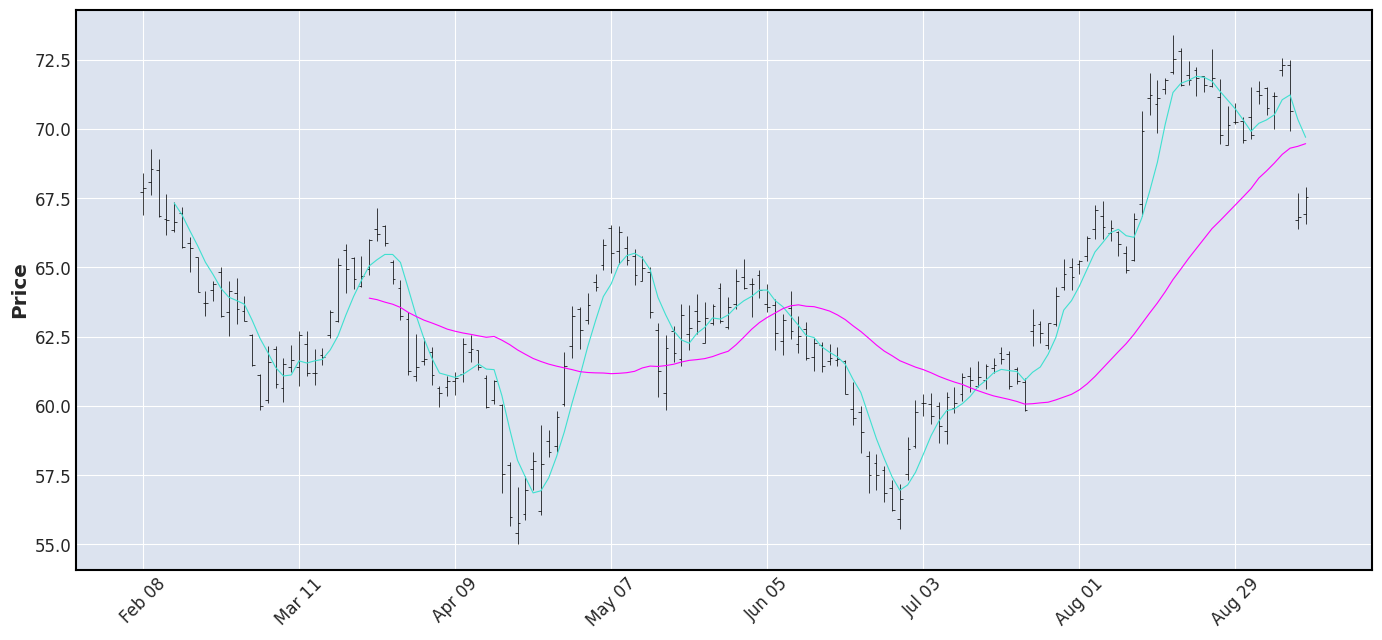

In [25]:
mpf.plot(data.iloc[:150], type='ohlc', mav=(5, 30), figsize=(18, 8))

That first moving average is barely visible, so we can customize the colors by creating a new `mplfinance` style where we can specify the `mavcolors` to cycle through when plotting moving averages.

Since we don't want to create an entirely new style from scratch, we'll use one of Matplotlib's styles and modify just what we need.

In [26]:
my_style = mpf.make_mpf_style(
    base_mpl_style='seaborn-v0_8-darkgrid',
    mavcolors=['blue', 'xkcd:gold', '#8E44AD']
)

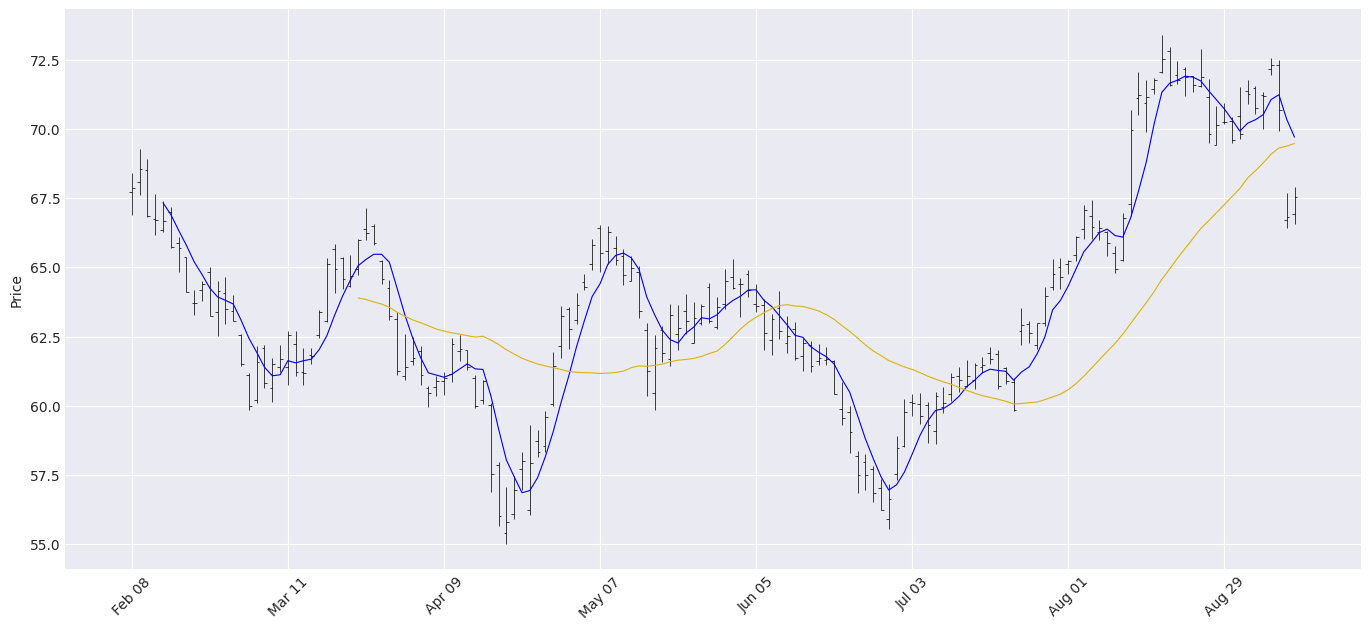

In [32]:
mpf.plot(
    data.iloc[:150], 
    type='ohlc', 
    mav=(5, 30), 
    figsize=(18, 8), 
    style=my_style
)

You can define colors using hex codes (like HTML colors are often coded), or even color palettes such as XKCD (and others).

https://xkcd.com/color/rgb/

https://htmlcolorcodes.com/

We can also add the Volume as a second subplot, and show the non-trading day gaps:

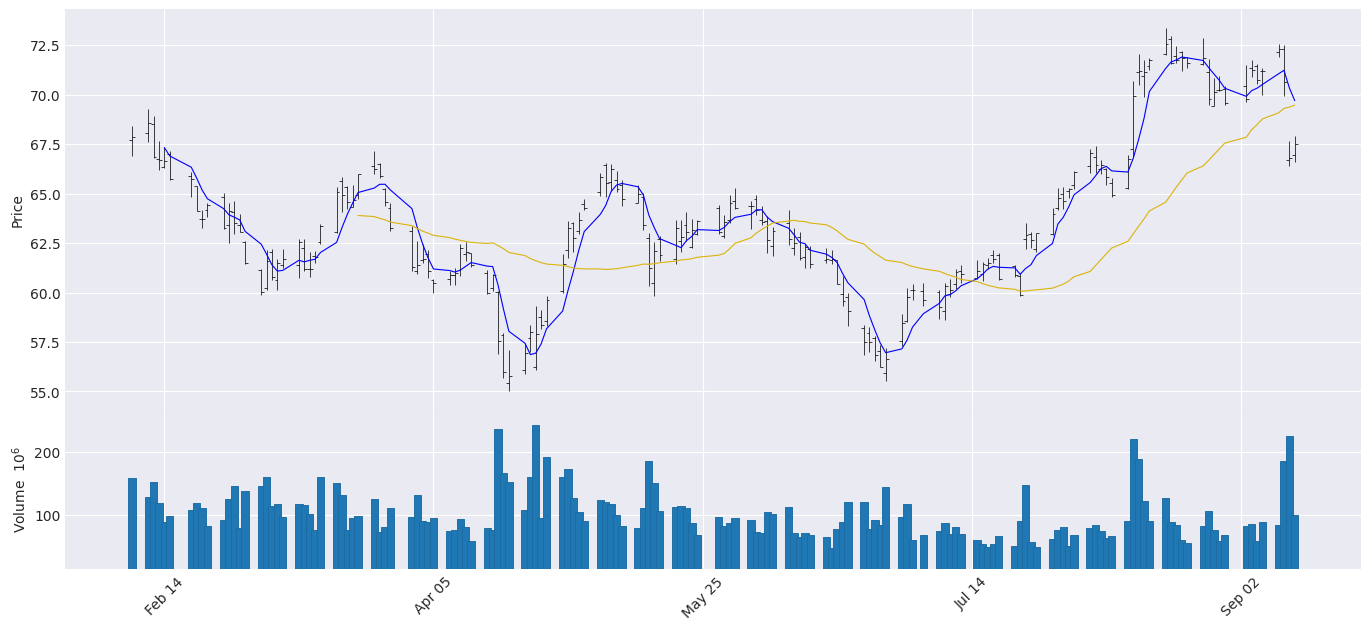

In [33]:
mpf.plot(
    data.iloc[:150], 
    type='ohlc', 
    mav=(5, 30), 
    volume=True, 
    show_nontrading=True, 
    figsize=(18, 8),
    style=my_style
)

We can further add customizations to the chart, such as titles, axis labels, etc:

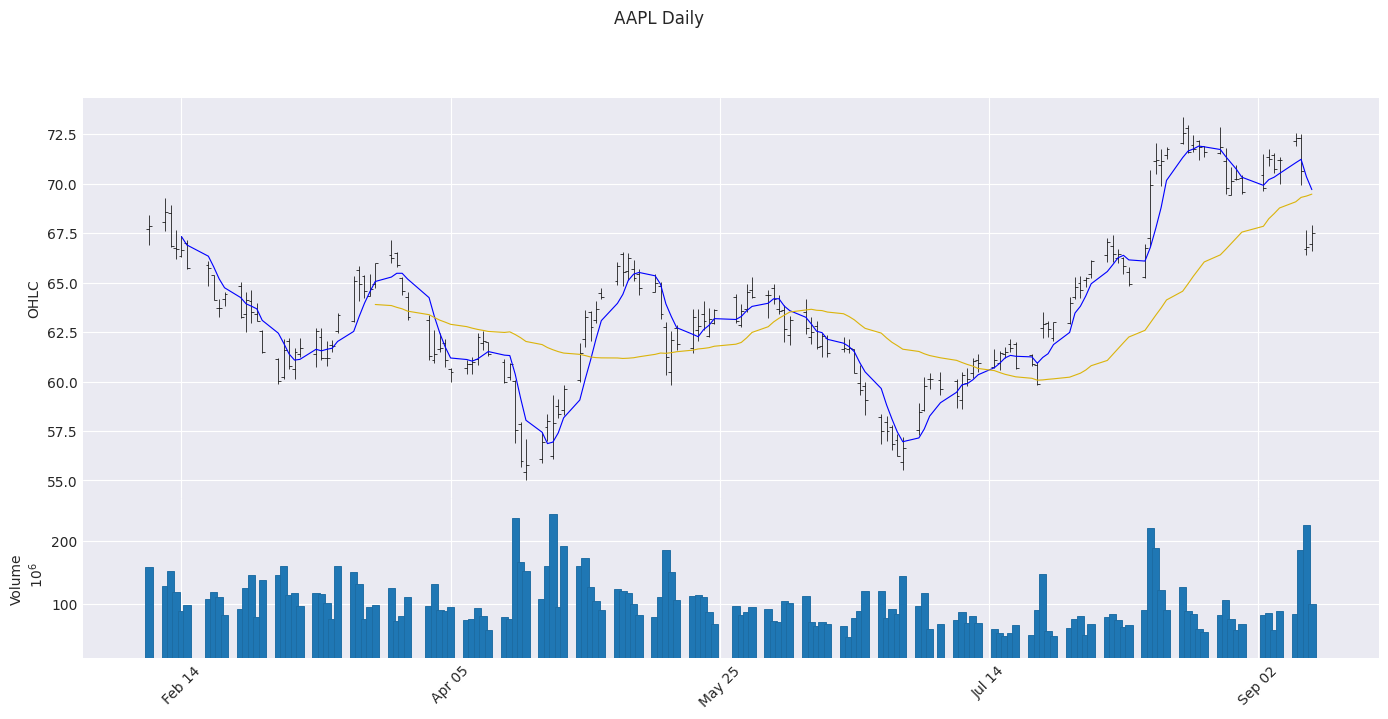

In [35]:
mpf.plot(
    data.iloc[:150], 
    type='ohlc', 
    mav=(5, 30), 
    volume=True,
    show_nontrading=True, 
    title='AAPL Daily',
    ylabel='OHLC',
    ylabel_lower='Volume',
    figsize=(18, 8),
    style=my_style
)

We could also add additional plots, such as Bollinger bands (using the standard period of 20 and 2 std deviations).

In [62]:
period = 20
std = 2
data['ma20'] = data['close'].rolling(window=period).mean()
data['std20'] = data['close'].rolling(window=period).std()
data['upper'] = data['ma20'] + data['std20'] * std
data['lower'] = data['ma20'] - data['std20'] * std

data

,open,high,low,close,volume,ma20,std20,upper,lower
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,NaN,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,NaN,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,NaN,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,NaN,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,173.8700,3.920716,181.711431,166.028569
2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,173.2435,4.932542,183.108584,163.378416
2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,172.3180,6.167542,184.653084,159.982916


We first create the additional subplots using just the columns we want (and the same rows as we'll use in the main plot):

In [63]:
data[['upper', 'ma20', 'lower']].iloc[:150]

,upper,ma20,lower
date,,,
2013-02-08,NaN,NaN,NaN
2013-02-11,NaN,NaN,NaN
2013-02-12,NaN,NaN,NaN
2013-02-13,NaN,NaN,NaN
2013-02-14,NaN,NaN,NaN
...,...,...,...
2013-09-06,74.113325,70.481380,66.849435
2013-09-09,73.460825,70.850805,68.240785
2013-09-10,72.819451,71.045665,69.271879


In [64]:
bollinger = mpf.make_addplot(
    data[['upper', 'ma20', 'lower']].iloc[:150]
)

Then we add them to the main plot using the `addplot` argument:

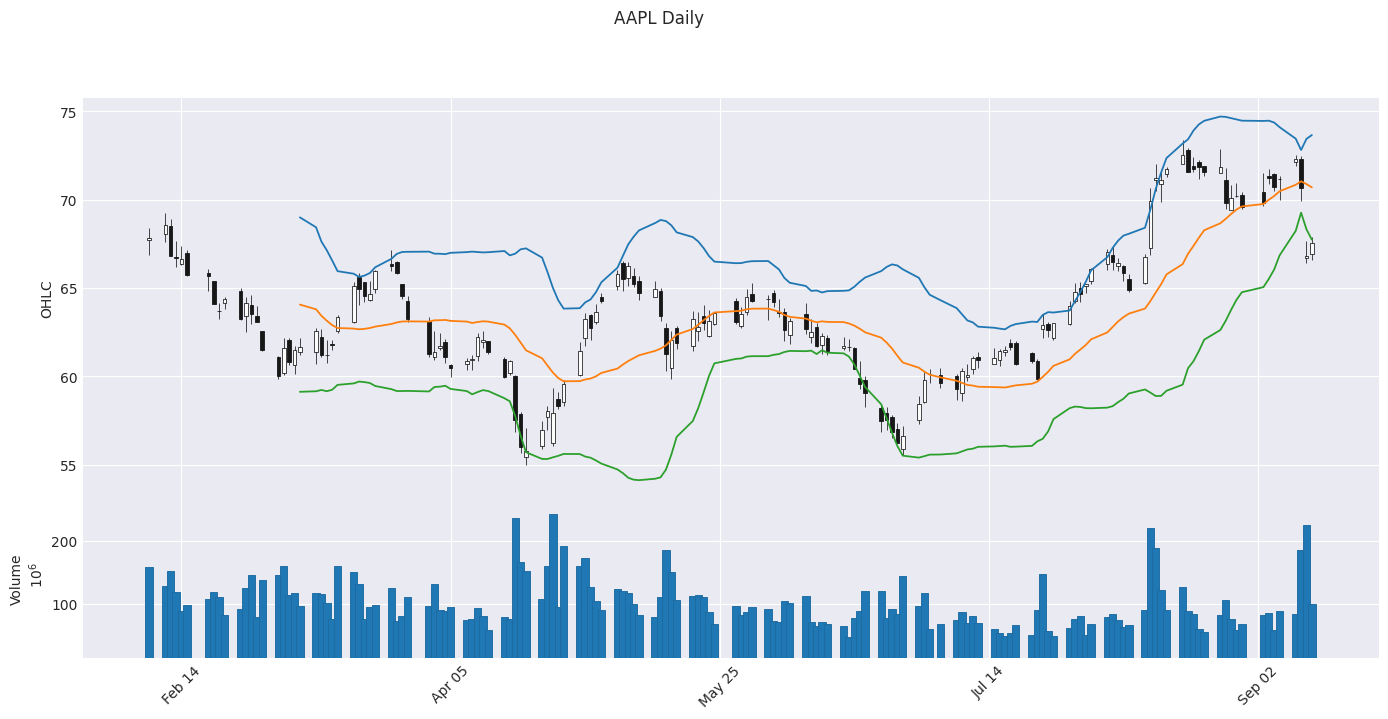

In [66]:
mpf.plot(
    data.iloc[:150], 
    addplot=bollinger,
    type='candle', 
    volume=True, 
    show_nontrading=True, 
    title='AAPL Daily',
    ylabel='OHLC',
    ylabel_lower='Volume',
    figsize=(18, 8),
    style=my_style
)